# Анализ A/B-тестирования (приложение интернет-магазина).

Цель исследования:

- оценить результаты проведенного А/B-тестирования;
- определить текущии параметры среднего чека и конверсии ;
- выбрать приоритетеное направление увеличения выручки на основе результатов тестовых групп.

Ничего не известно о качестве данных, поэтому для начала необходимо оценить их полноту и исправить ошибки. Перед нами таблица для приоритизации гипотез и выгрузка результатов тестирования по покупкам и визитам на сайт. 


***Описание данных:***

Файл hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
Файл visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span><ul class="toc-item"><li><span><a href="#Приоритизация-с-использованием-фреймворка-ICE." data-toc-modified-id="Приоритизация-с-использованием-фреймворка-ICE.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Приоритизация с использованием фреймворка ICE.</a></span></li><li><span><a href="#Приоритизация-с-использованием-фреймворка-RICE." data-toc-modified-id="Приоритизация-с-использованием-фреймворка-RICE.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приоритизация с использованием фреймворка RICE.</a></span></li><li><span><a href="#Изменения-в-приоритизации." data-toc-modified-id="Изменения-в-приоритизации.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изменения в приоритизации.</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста." data-toc-modified-id="Анализ-A/B-теста.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-предподготовка-данных." data-toc-modified-id="Загрузка-и-предподготовка-данных.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка и предподготовка данных.</a></span></li><li><span><a href="#Кумулятивная-выручка-по-группам." data-toc-modified-id="Кумулятивная-выручка-по-группам.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кумулятивная выручка по группам.</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам." data-toc-modified-id="Кумулятивный-средний-чек-по-группам.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Кумулятивный средний чек по группам.</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A." data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Относительное изменение кумулятивного среднего чека группы B к группе A.</a></span></li><li><span><a href="#Кумулятивное-среднее-количество-заказов-на-посетителя-по-группам." data-toc-modified-id="Кумулятивное-среднее-количество-заказов-на-посетителя-по-группам.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Кумулятивное среднее количество заказов на посетителя по группам.</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A." data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.</a></span></li><li><span><a href="#Разброс-количества-заказов-по-пользователям." data-toc-modified-id="Разброс-количества-заказов-по-пользователям.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Разброс количества заказов по пользователям.</a></span></li><li><span><a href="#Граница-для-определения-аномальных-пользователей-по-количеству-заказов." data-toc-modified-id="Граница-для-определения-аномальных-пользователей-по-количеству-заказов.-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Граница для определения аномальных пользователей по количеству заказов.</a></span></li><li><span><a href="#Разброс-суммы-заказов-по-пользователям." data-toc-modified-id="Разброс-суммы-заказов-по-пользователям.-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Разброс суммы заказов по пользователям.</a></span></li><li><span><a href="#Граница-для-определения-аномальных-пользователей-по-сумме-заказа." data-toc-modified-id="Граница-для-определения-аномальных-пользователей-по-сумме-заказа.-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Граница для определения аномальных пользователей по сумме заказа.</a></span></li><li><span><a href="#Различия-в-среднем-количестве-заказов--(сырые-данные)." data-toc-modified-id="Различия-в-среднем-количестве-заказов--(сырые-данные).-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Различия в среднем количестве заказов  (сырые данные).</a></span></li><li><span><a href="#Различия-в-среднем-чеке-(«сырые»-данные)." data-toc-modified-id="Различия-в-среднем-чеке-(«сырые»-данные).-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Различия в среднем чеке («сырые» данные).</a></span></li><li><span><a href="#Различия-в-среднем-количестве-заказов-(«очищенные»-данные)." data-toc-modified-id="Различия-в-среднем-количестве-заказов-(«очищенные»-данные).-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Различия в среднем количестве заказов («очищенные» данные).</a></span></li><li><span><a href="#Различия-в-среднем-чеке(«очищенные»-данные)." data-toc-modified-id="Различия-в-среднем-чеке(«очищенные»-данные).-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Различия в среднем чеке(«очищенные» данные).</a></span></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li></ul></div>

### Приоритизация гипотез.

Загружаем библиотеки для анализа.

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим файл с гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/______')
  
except:
    hypothesis = pd.read_csv('https://_________')


In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('max_colwidth', 110)
pd.set_option('display.width', 500)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проверим типы данных.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


С типами данных все в порядке, можно приступать к приоритизации.

#### Приоритизация с использованием фреймворка ICE.

In [5]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


При приоритизации с помощью фреймворка ICE  наиболее перспективные гипотезы для проверки под номерами 8, 0, 7. Т.е. по ICE приоритетны проверки гипотез по запуске акции со скидкой на день рождения, добавление двух новых каналов привлечния трафика, добавление формы подписки на соновные страницы. Теперь необходимо посмотреть какие результаты даст приоритезация по RICE.

#### Приоритизация с использованием фреймворка RICE.

In [6]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.000


При использование фреймворка RICE приоритизация дала немного иные результаты - в тройке лидеров гипотезы под номером 7, 2, 0. То есть гипотезы по добавлению формы подписки и двум новым каналам привлечения остались в топ-, а также к ним добавилась гипотеза по добавлению блоков рекомендаций.

#### Изменения в приоритизации.

In [7]:
#проставим ранги в зависимости от номера по шкале приоритизации
hypothesis['iceRank'] = hypothesis['ICE'].rank(ascending=False)
hypothesis['riceRank'] = hypothesis['RICE'].rank(ascending=False)
# найдем изменения в ранге
hypothesis['delta'] = hypothesis['iceRank'] - hypothesis['riceRank']
hypothesis.sort_values(by='RICE', ascending=False).style.bar(subset=['delta'],
          align='mid',
          color=['pink', 'yellowgreen'],
          vmin=hypothesis['delta'].min(),
          vmax=hypothesis['delta'].max()
     )


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE,iceRank,riceRank,delta
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000,3.000000,1.000000,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000,5.000000,2.000000,3.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.000000,2.000000,3.500000,-1.500000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000,4.000000,3.500000,0.500000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000,1.000000,5.000000,-4.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.000000,8.000000,6.000000,2.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000,6.000000,7.500000,-1.500000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.000000,7.000000,7.500000,-0.500000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000,9.000000,9.000000,0.000000


Таким образом, из-за того, что изменения, отраженные в гипотезах под номером 7, 2, 6, 3 влияют на большее количество пользователей(параметр Reach), при ранжировании по RICE они стали иметь больший приоритет, чем при использовании фреймворка ICE.

### Анализ A/B-теста.

#### Загрузка и предподготовка данных.

Загрузим файлы с результатами проведенного A/B-теста.

In [8]:
try:
    orders = pd.read_csv('/datasets/_______.csv')
    visitors = pd.read_csv('/datasets/_____.csv')
  
except:
    orders = pd.read_csv('https://_________.csv')
    visitors = pd.read_csv('https://_______.csv')


In [9]:
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим данные на пропуски.

In [10]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропуски не обнаружены, но типы данных соответствуют содержимому. Необходимо привести даты к соответсвующему типу.

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

После изменения типов данных проверим нет ли дубликатов.

In [12]:
display('Количество дубликатов в таблице visitors {}'.format(visitors.duplicated().sum()))
display('Количество дубликатов в таблице orders {}'.format(orders.duplicated().sum()))

'Количество дубликатов в таблице visitors 0'

'Количество дубликатов в таблице orders 0'

Дубликатов не обнаружено, проверим, что изменения применились к таблицам.

In [13]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таким образом, мы проверили загруженные таблицы на наличие дубликатов, пропусков (ни тех, ни других не обнаружено), и изменили типы данных для дальнейшего анализа A/B-тестирования.

Проверим, нет ли неверного распределения одних и тех же пользователей в разные группы.

In [14]:
wrong_orders = orders.pivot_table(
    index='visitorId',
    columns ='group',
    aggfunc = {'date':'count', 'revenue':'sum'}).dropna().reset_index()
display(wrong_orders.head(5))
len(wrong_orders)

visitorId  date         revenue          
group                A     B         A         B
0        8300375 1.000 1.000  1790.000 10510.000
1      199603092 4.000 1.000 19692.000  3488.000
2      232979603 1.000 1.000    60.000  2640.000
3      237748145 4.000 1.000  3190.000  7620.000
4      276558944 1.000 1.000  5050.000 12350.000

58

Таких пользователей достаточно много. Почистим данные от них.

In [15]:
wrong_orders = wrong_orders['visitorId'].to_numpy()
display(len(orders))
orders = orders.query('~(visitorId in @wrong_orders)')
len(orders)

1197

1016

Таким образом, мы проверили загруженные таблицы на наличие дубликатов, пропусков (ни тех, ни других не обнаружено), и изменили типы данных для дальнейшего анализа A/B-тестирования. Кроме того, мы удалили из выборки пользователей, попавших в обе группы.

#### Кумулятивная выручка по группам.

In [16]:
display(
    'Максимальная дата в заказах {}, минимальная дата заказа{}; максимальная дата посещения {}, минимальная дата посещения{}'
    .format(orders['date'].max(), orders['date'].min(), visitors['date'].max(), visitors['date'].min()))

('Уникальные группы в заказах {}, уникальные группы в посещениях {}'
        .format(orders['group'].unique(), visitors['group'].unique()))

'Максимальная дата в заказах 2019-08-31 00:00:00, минимальная дата заказа2019-08-01 00:00:00; максимальная дата посещения 2019-08-31 00:00:00, минимальная дата посещения2019-08-01 00:00:00'

"Уникальные группы в заказах ['B' 'A'], уникальные группы в посещениях ['A' 'B']"

Названия групп сходятся в таблицах заказов и посещений интернет-магазина, данные преставлены за период с 1 августа 2019г. по 31 августа 2019г. Можем приступать к агрегированию и расчету куммулятивных данных.

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#агрегируем данные по заказам
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

#агрегируем данные по визитам
visitorsAggregated = (datesGroups
                    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Проверим полноту данных, за август месяц по двум группах должно образоваться 31*2=62 записи

In [18]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.0+ KB


Все верно, у нас 62 записи, можем построить график куммулятивной выручки.

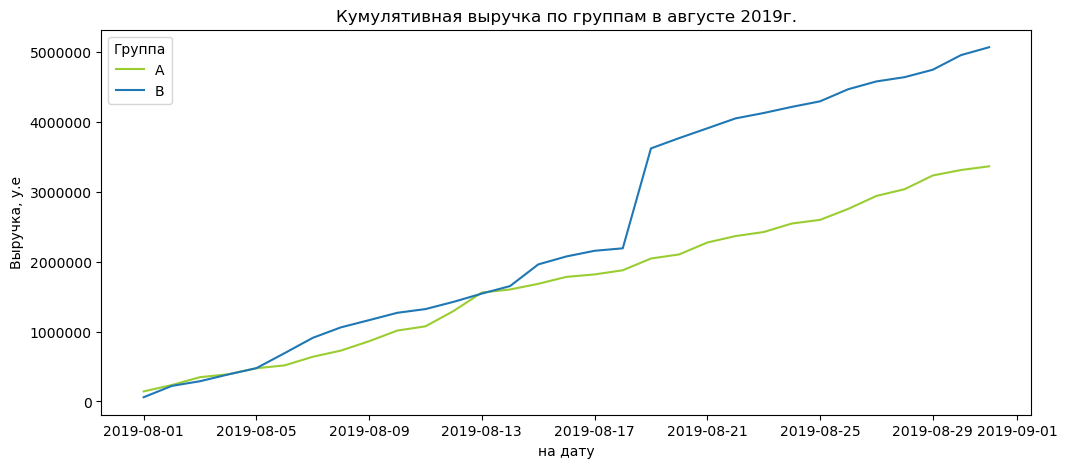

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#размер графика
plt.figure(figsize=(12, 5))
plt.ticklabel_format(style='plain')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='yellowgreen')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('Кумулятивная выручка по группам в августе 2019г.')
plt.ylabel('Выручка, у.е')
plt.xlabel('на дату')
plt.legend(title='Группа', fontsize=10)
plt.show()


Как видно из графика, в начале месяца (до 5 августа) две группы шли наравне, а до середины месяца группа B шла с небольшим отрывом. А к концу месяца выручка по группе B  на 2 млн превысила выручку по покупателям из группы А. Возможно до середины месяца пользователи осваивались с нововведением, а затем оценили его преимущества. Также такая ситуация может наблюдаться в связи с демо-версией доп.функций без оплаты до 15 дней. Или же была совершена крупная покупка между 17 и 21 августа, которая меняет существенно картину (мы видим скачок на графике в этом периоде.

In [20]:
orders.groupby(by='group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,468.000,7189.436,11137.761,50.000,1164.750,3090.000,8438.750,92550.000
B,548.000,9249.949,56430.591,50.000,1280.750,2898.500,7991.250,1294500.000


Как мы видим, в группе B при среднем значении в 9250 у.е есть сильно отклоняющееся значение в 1,3 млн. И хотя среднее действительно немного выше, чем в группе А, но такая покупка с аномальной суммой сильно меняет картину.

#### Кумулятивный средний чек по группам.

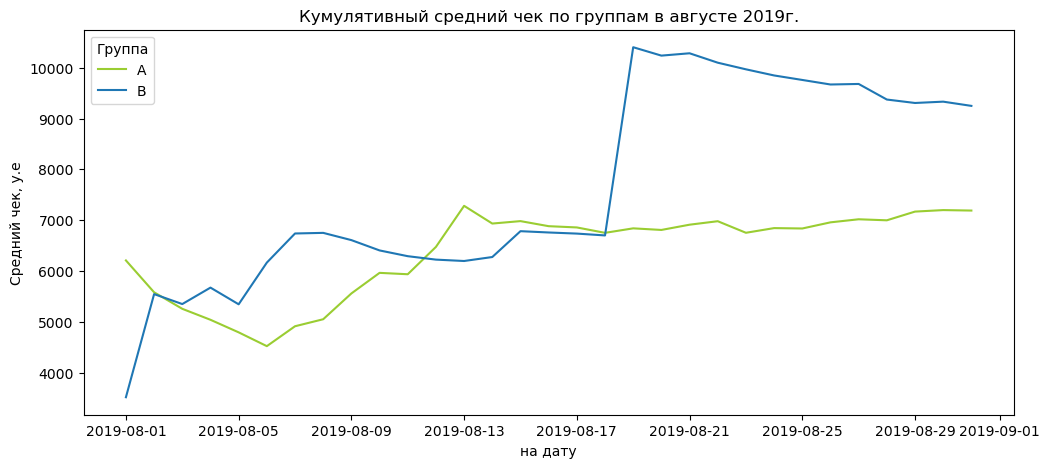

In [21]:
#размер графика
plt.figure(figsize=(12, 5))
plt.ticklabel_format(style='plain')

#делим выручку на количество заказов и строим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A',  color='yellowgreen')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по группам в августе 2019г.')
plt.ylabel('Средний чек, у.е')
plt.xlabel('на дату')
plt.legend(title='Группа', fontsize=10)
plt.show()

Действительно -  и средний чек скачет, как в группе А(например покупки 13 августа), так и в группе B (ориентировочно 19-20 августа). Как мы видели ранее в таблице с разбросом значений, есть аномально дорогие покупки, что подтверждает также большое среднеквадратичное отклонение , особенно по группе В.

#### Относительное изменение кумулятивного среднего чека группы B к группе A.

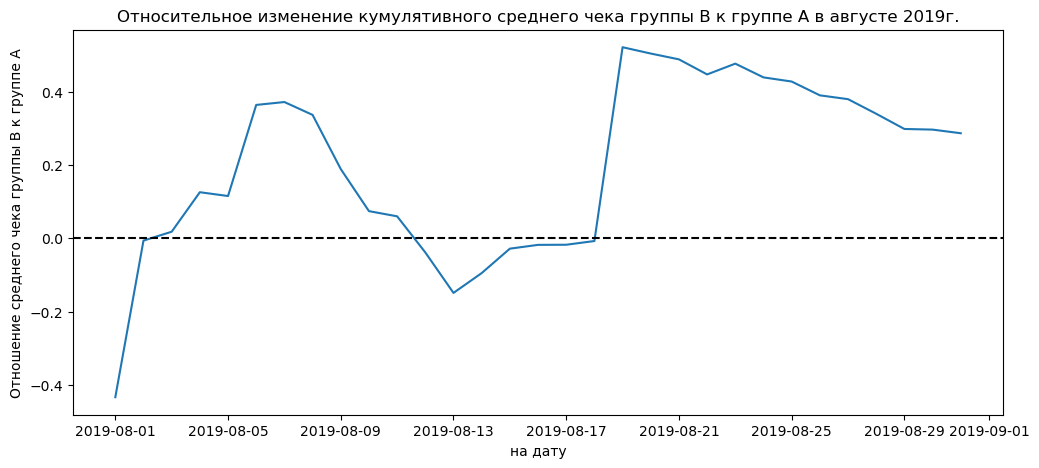

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])
#размер графика
plt.figure(figsize=(12, 5))
plt.ticklabel_format(style='plain')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A в августе 2019г.')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.xlabel('на дату')
plt.show()

Отношение среднего чека, которое имеет резкие скачки 5, 13, 21 августа только подтверждает наши догадки, что в данных имеются аномалии.

#### Кумулятивное среднее количество заказов на посетителя по группам.

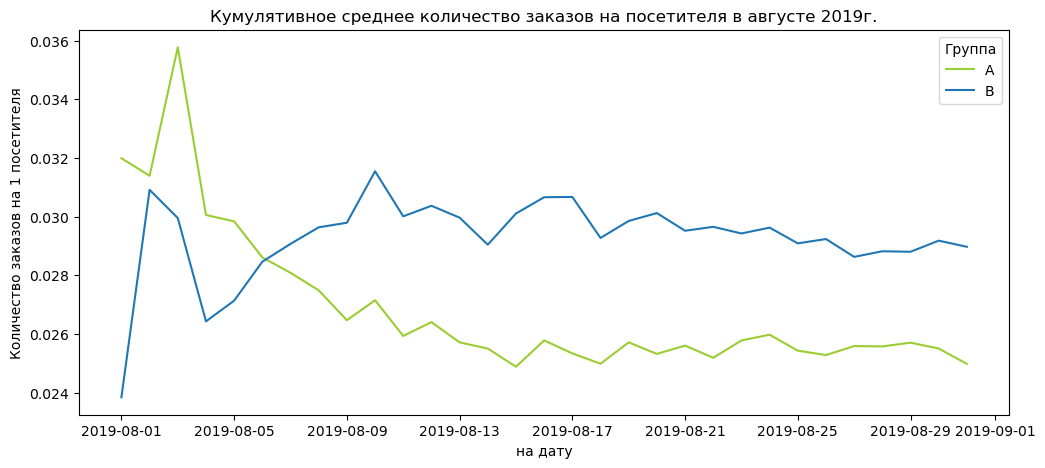

In [23]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#размер графика
plt.figure(figsize=(12, 5))


# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'yellowgreen')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Кумулятивное среднее количество заказов на посетителя в августе 2019г.')
plt.ylabel('Количество заказов на 1 посетителя')
plt.xlabel('на дату')
plt.legend(title='Группа', fontsize=10)
plt.show()


График среднего количества заказов практически симметричный. И если в начале месяца доля заказов среди посетителей у группы А была больше, то после 5 августа сирьезно выросли заказы в группе В, а группа А симметрично просела.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.

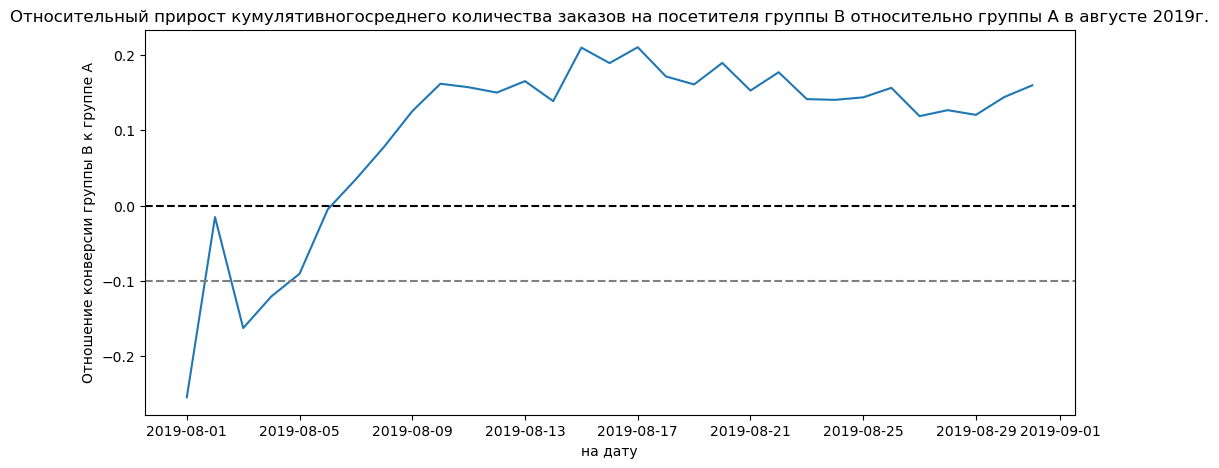

In [24]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                            .merge(cumulativeDataB[['date','conversion']],
                                  left_on='date',
                                  right_on='date',
                                  how='left',
                                  suffixes=['A', 'B']))
#размер графика
plt.figure(figsize=(12, 5))

#строим график
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительный прирост кумулятивного\
среднего количества заказов на посетителя группы B относительно группы A в августе 2019г.')
plt.ylabel('Отношение конверсии группы В к группе А')
plt.xlabel('на дату')
plt.show()


До 5 августа в целом конверсия в группе В была хуже того же показателя группы А. Но с 6 августа показатель начал расти. До конца месяца конверсия в группе В была значительно лучше группы и составляла к 31 августа 15%.

#### Разброс количества заказов по пользователям.

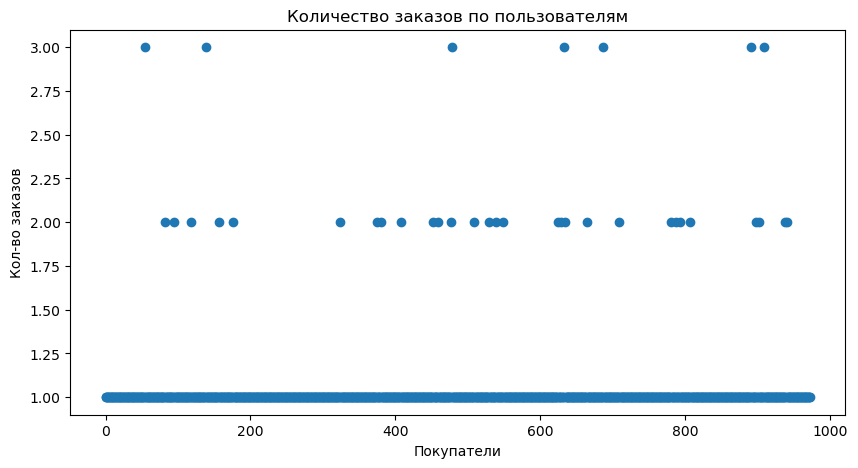

In [25]:
#сгруппируем данные по пользователям и найдем кол-во уникальных заказов
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

#размер графика
plt.figure(figsize=(10, 5))

#строим график
plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Количество заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Покупатели')
plt.show()

На диаграмме разброса видно, что покупатели делают не более 3х заказов за месяц, но основная масса - 1 заказ. Соответственно больше 3х заказов за месяц  аномально и будет  искажать статистику. Нужно определиться с границей, выше которой пользователи не войдут в выборку.

#### Граница для определения аномальных пользователей по количеству заказов.

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Таким образом, только 5% покупателей совершали более 1 заказа за месяц. А более 2х заказов в августе делали только 1% покупателей. Исходя из диаграммы рассеивания и расчета перцентилей целесообразно ограничить выборку покупателями с не более 2мя заказами.

####   Разброс суммы заказов по пользователям.

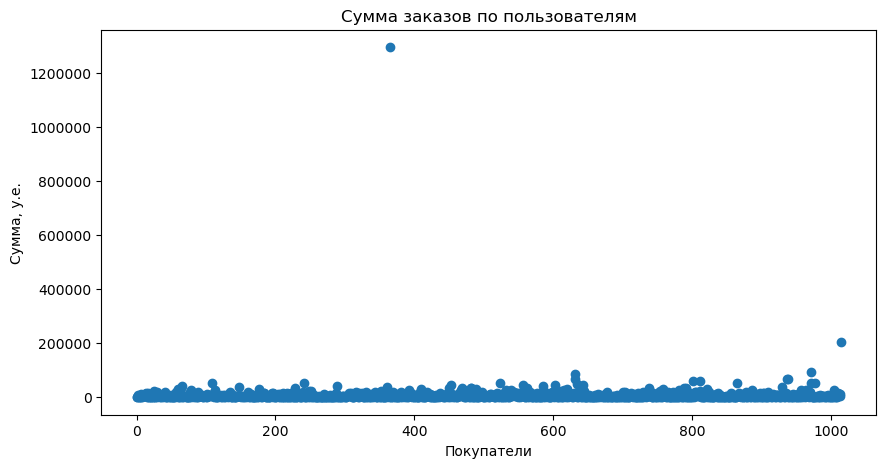

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))


plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')

plt.scatter(x_values, orders['revenue']) 

plt.title('Сумма заказов по пользователям')
plt.ylabel('Сумма, у.е.')
plt.xlabel('Покупатели')
plt.show()

Как видим, сильно выбивается ранее определенный нами заказ на сумму более 1,2 млн и смазывает нам общую картину, ограничим оси и посмотрим подробнее.

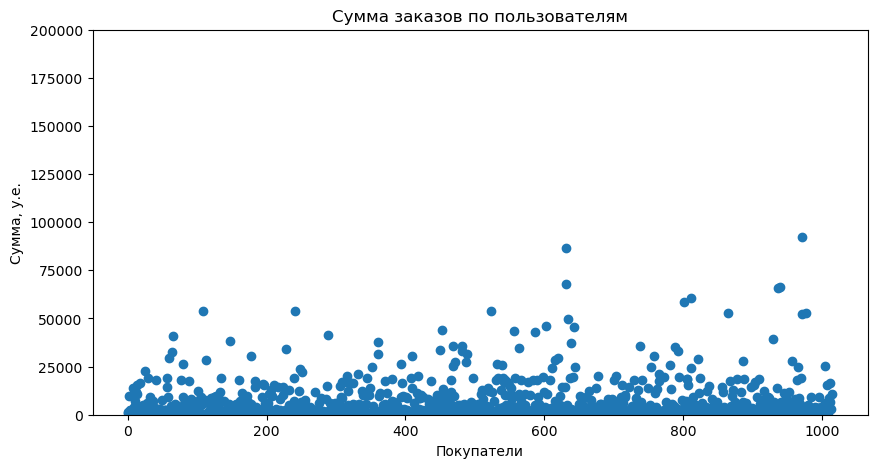

In [28]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue']) 

plt.title('Сумма заказов по пользователям')
plt.ylabel('Сумма, у.е.')
plt.xlabel('Покупатели')
plt.ylim (0, 200000)
plt.show()

Основная масса заказов не превышает сумму в 50 тыс руб. Аномальные значения сильно влияют на общую оценку, поэтому определим границу с помощью перцентилей.

#### Граница для определения аномальных пользователей по сумме заказа.

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 27 тыс. и не более 1% дороже 54 тыс. у.е. Остановимся посередине между этими показателями для определения границы - на 40 тыс.

#### Различия в среднем количестве заказов  (сырые данные).

Создадим сводную таблицу, в которой будут содержаться данные за соответствующую дату, а также с накоплением.

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Теперь создадим таблицы для группы А и группы В отдельно, в которых будет содержаться индификатор пользователя и количество заказов.

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


Следующим шагом создаем два сэмпла с количеством заказов, для пустых пользователей без заказов также создаем нулевые строки.

In [32]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])),
               name='orders')], axis=0
)
display(sampleA.sample(7))
sampleB.sample(7)

5919     0
2730     0
12045    0
10740    0
13133    0
15001    0
18125    0
Name: orders, dtype: int64

14171    0
3380     0
14807    0
7025     0
3214     0
13082    0
8686     0
Name: orders, dtype: int64

Теперь можно посчитать стат.сначимость различий количества заказов в группе А и группе В. Для начала проведем расчеты по "сырым" данным - без удаления аномалий. Воспользуемся непараметрическим тест Уилкоксона-Манна-Уитни.

Сформируем гипотезы:\
alpha=0.05\
H0- различий в среднем количестве заказов между группами нет.\
H1 - различия в среднем между группами есть.\
Также дополнительно посчитаем изменение конверсии в группе В к конверсии в группе А.

In [33]:
display('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
display('Относительный прирост среднего группы В к конверсии группы А:', "{0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

'p-value:'

'0.011'

'Относительный прирост среднего группы В к конверсии группы А:'

'15.98%'

Таким образом, отвергаем нулевую гипотезу, т.к. p-value значительно ниже 0,05. А это значит, что различия в среднем между группами есть. В то же время относительный прирост конверсии группы В к группе А составляет 15.98%.

In [34]:
pd.concat([sampleA.value_counts(), sampleB.value_counts()],  axis=1, keys=['sampleA', 'sampleB'])

,sampleA,sampleB
orders,,
0,18291,18388
1,427,510
2,13,16
3,5,2


Как мы видим, достаточно большое количество пользователей (в среднем по 18,3 тыс. в каждой группе) не совершили ни одной покупки. Но при этом пользователей с одной и двумя покупками больше именно в группе В. Также имеются пользователи, которые совершили за месяц 3 покупки.

В целом на данном этапе по "сырым" данным тест показывает, что эффект от нововведений есть, и это отражается в группе В. И этотэффект имеет стат. значимость.

#### Различия в среднем чеке («сырые» данные).

Теперь сделаем тоже самое по среднему чеку. Воспользуемся сырыми данными и сформируем гипотезы.\
alpha=0.05\
Н0 - различий в среднем чеке между группами нет;\
Н1 - различия в среднем чеке между группами есть.\
Кроме критерия Манна-Уитни, оценим также и средние значения чеков по группам.

In [35]:
display(
    'p-value:',"{0:.3f}".format(
        st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                        orders[orders['group']=='B']['revenue'])[1])
)
display(
    'Относительный прирост среднего группы В к чеку группы А:',
    "{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/ orders[orders['group']=='A']['revenue'].mean()-1)
)

'p-value:'

'0.829'

'Относительный прирост среднего группы В к чеку группы А:'

'28.66%'

P-value выше заданного уровня alpha, а это значит, что различия в размере чека по "сырым" данным не имеют достаточного уровня стат значимости, соответсвенно мы принимаем нулевую гипотезу, а наблюдаемое относительное различие в 28,7% не является стат.значимым.

#### Различия в среднем количестве заказов («очищенные» данные).

Начнем с того, что нужно очистить данные. При расчете процентилей мы условились, что в очищенную выборку возьмем заказы с суммой не более 40 тыс., а также пользователе с не более чем 2мя заказами. Определим этих пользователей.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64

30

Всего у нас 30 пользователь с такими аномальными заказами. Подготовим сэмплы по заказам без аномальных пользователей.

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
display(sampleAFiltered.unique())
sampleBFiltered.unique()

array([1, 2, 0], dtype=int64)

array([1, 2, 0], dtype=int64)

Судя по уникальным значениям двух сэмплов, данные очистились, можно приступать к тестированию. Определим нулевую и альтернативную гипотезы:\
H0- различий в среднем количестве заказов между группами нет;\
H1 - различия в среднем между группами есть.\
Определим традиционно alpha = 0.05. Кроме того, посчитаем изменение конверсии в группе В к конверсии в группе А.

In [38]:
display('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display(
    'Относительный прирост среднего группы В к конверсии группы А:',
    "{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-value:'

'0.004'

'Относительный прирост среднего группы В к конверсии группы А:'

'20.48%'

Согласно проведенного теста по очищенным данным, можно сказать, что нулевая гипотеза не подтвердилсь, а значит группа В (также как и по "сырым" данным) отлична от группы А по показателю конверсии. Это же подтверждает и прирост конверсии в группе В на 20,5% по сравнению с группой А.

#### Различия в среднем чеке(«очищенные» данные).

Посмотрим на изменения в среднем чеке на основании "чистых" данных. Сформулируем гипотезы:\
H0- различий в среднем чеке между группами нет;\
H1 - различия в среднем чеке по группам есть.\
alpha = 0.05.
Кроме того, посчитаем относительное изменение чека в группе В к среднему чеку в группе А.


In [39]:
display(
    'p-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    'Относительный прирост среднего группы В к чеку группы А:',
    "{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value:'

'0.937'

'Относительный прирост среднего группы В к чеку группы А:'

'5.5%'

Можем сделать вывод, что и по очищенным данным тест подтвержает равенство средних чеков между группами А и В. И несмотря на относительный прирост среднего значения в 5.5%, стат.значимости такие различия не имеют. А значит нововведение никак не повлияло на изменение суммы покупки пользователей. Стоит также отметить, что прирост по среднему чеку в очищенных данных существенно сократился (на что повлияло в том числе удаление из сэмпла группы В аномально большого заказа суммой более 1,2 млн.руб.

#### Вывод.

***По результатам проведенного A/B тестирования в августе 2019г. можно сделать следующие выводы - эффект от нововведений, примененных на группу В, достигнут. Можно останавливать тест и зафиксировать победу группы В.***

Подробнее о результатах анализа. Кумулятивные показатели, хотя и отмечают частично приоритет группы В, но полноценно их использовать как призыв к действиям сложно. Но то, что точно на их основе можно сказать - `есть явные аномалии в заказах` -как по сумме, так и по количеству заказов(об этом нам говорят резкие скачки на диаграммах). При дальнейшем анализе, выяснилось, что `только 5% покупателей совершали более 1 заказа за месяц, а сумма основной массы заказов не превышает и 50 тыс.` 

Анализ на основе критерия Манна-Уитни при учете "сырых" данных показал, что `различия в среднем количестве заказов между группами есть` (величина p-value 0.011). В то же время `относительный прирост конверсии` группы В к группе А составляет по сырым данным `16%`. Различий в размере чека по "сырым" данным тест не показал, хотя и `средний чек в группе В значительно выше` - на 28%, что связано, как отмечалось ранее, с аномально дорогими заказами.

Дальнейший расчет перцентилей помог вычленить актуальные данные для подготовки очищенных сэмплов к тестированию . Мы остановили свое внимание на данных с суммой заказа не более 40 тыс., а также пользователях с не более чем 2мя заказами.  

`По очищенным данным` тест на равенство среднего количества заказов  не подтвердился, `среднее кол-во заказов отличается` и с еще большим размером стат.значимости, чем по "сырым" данным. Это же подтверждает и `прирост конверсии` в группе В на 20% по сравнению с группой А.

А вот `отличий между суммами заказов`  по очищенным данным фактически `нет` (точнее они не имеют стат.значимости).
Нововведение никак `не повлияло на увеличение суммы покупки` группы В (особенно, если отбросить аномальные значения).
Но проведенный анализ показывает, что А/В тест можно останавливать и закрепить `успех за группой В`, ведь `повышенная конверсия` имеет большую ценность с точки зрения перспективы чем одномоментное увеличение суммы покупки.